In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
file_path = r"C:\Users\Sargunam\OneDrive\Desktop\UG PROJECT\Data.csv"
df = pd.read_csv(file_path)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.info()
print(df['RiskLevel'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5486 non-null   int64  
 1   SystolicBP   5486 non-null   int64  
 2   DiastolicBP  5486 non-null   int64  
 3   BS           5486 non-null   float64
 4   BodyTemp     5486 non-null   float64
 5   HeartRate    5486 non-null   int64  
 6   RiskLevel    5486 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 300.1+ KB
RiskLevel
low risk     2215
mid risk     1766
high risk    1505
Name: count, dtype: int64


In [6]:

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])  # e.g., High=0, Low=1, Mid=2 (depends on encoding order)



In [7]:

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']



In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       306
           1       0.97      0.88      0.92       443
           2       0.86      0.94      0.90       349

    accuracy                           0.93      1098
   macro avg       0.93      0.93      0.93      1098
weighted avg       0.93      0.93      0.93      1098



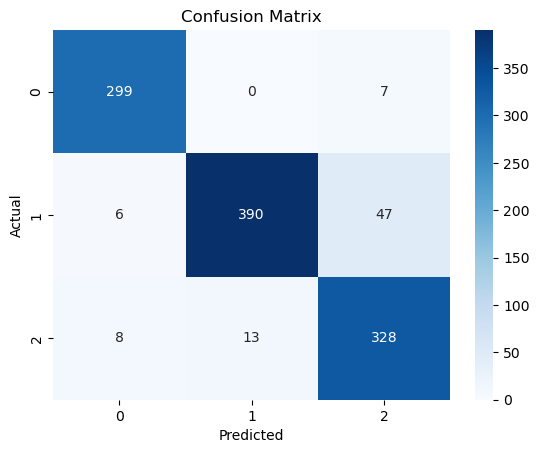

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:

pd.set_option('display.max_rows', None)       
pd.set_option('display.max_columns', None)    
pd.set_option('display.width', None)         
pd.set_option('display.max_colwidth', None)  
def classify_bp(sbp, dbp):
    if sbp < 90 or dbp < 60:
        return -1  # No Risk (Low BP)
    elif (90 <= sbp <= 120) and (60 <= dbp <= 80):
        return 0   # Low Risk (Normal BP)
    elif sbp > 140 or dbp > 90:
        return 1   # High Risk (High BP)
    else:
        return 0   



df['BP_Risk'] = df.apply(lambda row: classify_bp(row['SystolicBP'], row['DiastolicBP']), axis=1)


print(df[['SystolicBP', 'DiastolicBP', 'BP_Risk']])


      SystolicBP  DiastolicBP  BP_Risk
0            130           80        0
1            140           90        0
2             90           70        0
3            140           85        0
4            120           60        0
5            140           80        0
6            130           70        0
7             85           60       -1
8            120           90        0
9            130           80        0
10            90           60        0
11           120           80        0
12           110           89        0
13           120           75        0
14           120           80        0
15           120           80        0
16           140           90        0
17           140          100        1
18           120           80        0
19            70           50       -1
20           140          100        1
21           140           80        0
22            90           65        0
23            90           60        0
24           120         